# Data Collection

In [46]:
import pandas as pd
import numpy as np

In [47]:
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv(r"C:\Users\geeth\Downloads\supply_chain_data.csv")

In [49]:
print("Shape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nSample rows:")
display(df.head())

Shape: (100, 24)

Columns: ['Product type', 'SKU', 'Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Customer demographics', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location', 'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Inspection results', 'Defect rates', 'Transportation modes', 'Routes', 'Costs']

Sample rows:


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [50]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("\nNumeric columns:", num_cols)
print("Categorical columns:", cat_cols)


Numeric columns: ['Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs', 'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Defect rates', 'Costs']
Categorical columns: ['Product type', 'SKU', 'Customer demographics', 'Shipping carriers', 'Supplier name', 'Location', 'Inspection results', 'Transportation modes', 'Routes']


In [51]:
# Check NaN / Inf
nan_counts = df.isna().sum().sort_values(ascending=False)
inf_counts = np.isinf(df.select_dtypes(include=[np.number])).sum().sort_values(ascending=False)
print("\nNaN counts per column:\n", nan_counts[nan_counts>0])
print("\nInf counts per numeric column:\n", inf_counts[inf_counts>0])


NaN counts per column:
 Series([], dtype: int64)

Inf counts per numeric column:
 Series([], dtype: int64)


# Data Cleaning

In [52]:
#Clean NaN/Inf & Handle Extreme Values ---
df_clean = df.copy()

In [53]:
# Replace infinities with NaN first
for c in num_cols:
    if c in df_clean.columns:
        df_clean[c] = pd.to_numeric(df_clean[c], errors='coerce')
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)

In [54]:
# Report after replacement
print("\nAfter replacing inf -> NaN, remaining NaN counts (top 10):")
display(df_clean.isna().sum().sort_values(ascending=False).head(10))


After replacing inf -> NaN, remaining NaN counts (top 10):


Product type               0
SKU                        0
Routes                     0
Transportation modes       0
Defect rates               0
Inspection results         0
Manufacturing costs        0
Manufacturing lead time    0
Production volumes         0
Lead time                  0
dtype: int64

In [55]:
# Median impute numeric; mode impute categorical
for c in num_cols:
    if c in df_clean.columns:
        median_val = df_clean[c].median()
        df_clean[c] = df_clean[c].fillna(median_val)

for c in cat_cols:
    if c in df_clean.columns:
        mode_val = df_clean[c].mode().iloc[0] if not df_clean[c].mode().empty else "Unknown"
        df_clean[c] = df_clean[c].fillna(mode_val)


In [56]:
# Winsorize numeric columns (clip extreme outliers at 1st–99th percentile to prevent scale explosions)
for c in num_cols:
    q01 = df_clean[c].quantile(0.01)
    q99 = df_clean[c].quantile(0.99)
    df_clean[c] = df_clean[c].clip(q01, q99)

print("\nFinished basic cleaning & outlier clipping.")
display(df_clean.head())


Finished basic cleaning & outlier clipping.


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55.0,802.00,8661.996792,Non-binary,58.0,7,96.0,...,Mumbai,29,215.0,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95.0,736.00,7460.900065,Female,53.0,30,37.0,...,Mumbai,23,517.0,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34.0,23.84,9577.749626,Unknown,1.0,10,88.0,...,Mumbai,12,971.0,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68.0,83.00,7766.836426,Non-binary,23.0,13,59.0,...,Kolkata,24,937.0,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26.0,871.00,2686.505152,Non-binary,5.0,3,56.0,...,Delhi,5,414.0,3,92.065161,Fail,3.145580,Air,Route A,923.440632


# Exploratory Data Analysis (EDA)

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Price', ylabel='Count'>

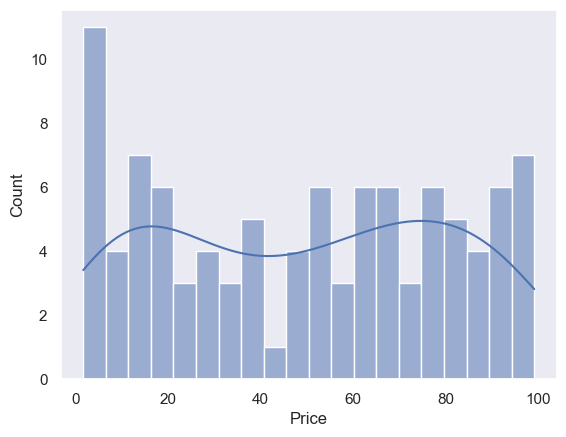

In [58]:
sns.set(style='dark')
sns.histplot(df['Price'], kde = True, bins = 20)

<Axes: xlabel='Price'>

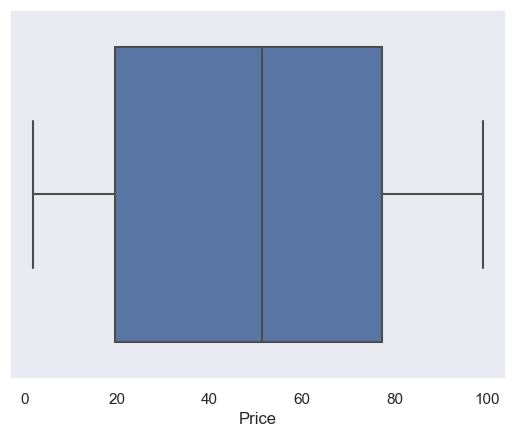

In [59]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='Price', ylabel='Revenue generated'>

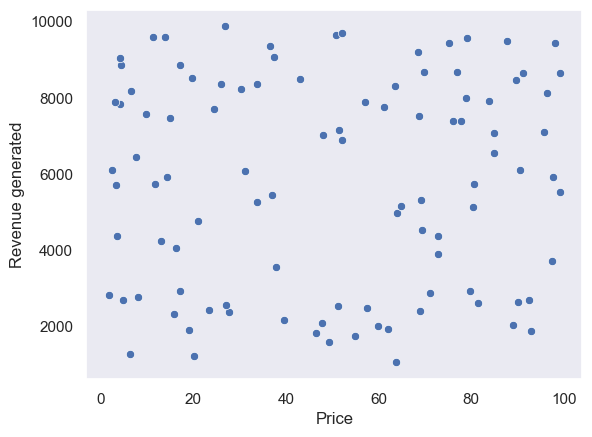

In [60]:
# Revenue vs. Price – Scatter plot
sns.scatterplot(x='Price', y='Revenue generated', data=df)

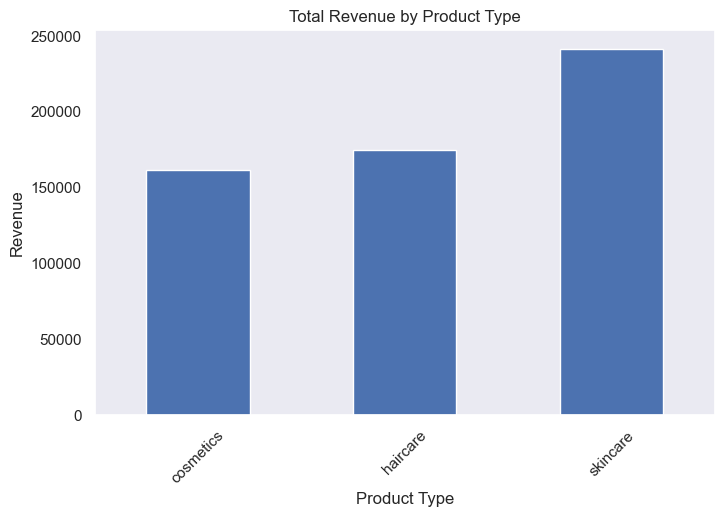

In [61]:
rev_by_product = df.groupby("Product type")["Revenue generated"].sum()
plt.figure(figsize=(8,5))
rev_by_product.plot(kind="bar")
plt.title("Total Revenue by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

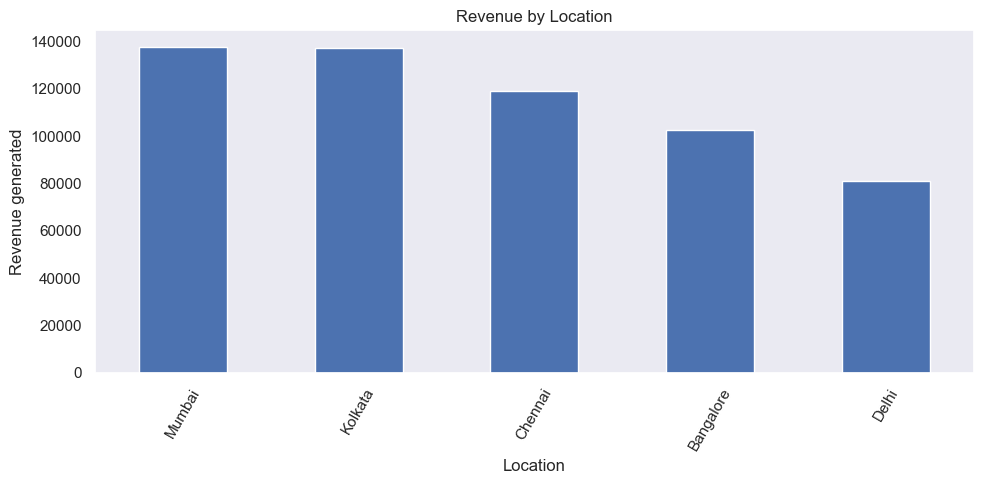

In [62]:
rev_by_loc = df.groupby("Location")["Revenue generated"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
rev_by_loc.plot(kind="bar")
plt.title("Revenue by Location")
plt.xlabel("Location")
plt.ylabel("Revenue generated")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

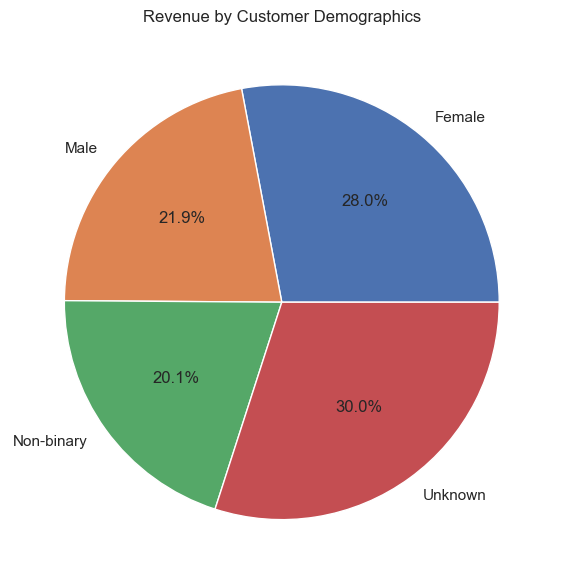

In [63]:
rev_by_demo = df.groupby("Customer demographics")["Revenue generated"].sum()
plt.figure(figsize=(6,6))
rev_by_demo.plot(kind="pie", autopct="%1.1f%%")
plt.title("Revenue by Customer Demographics")
plt.ylabel("")
plt.tight_layout()
plt.show()

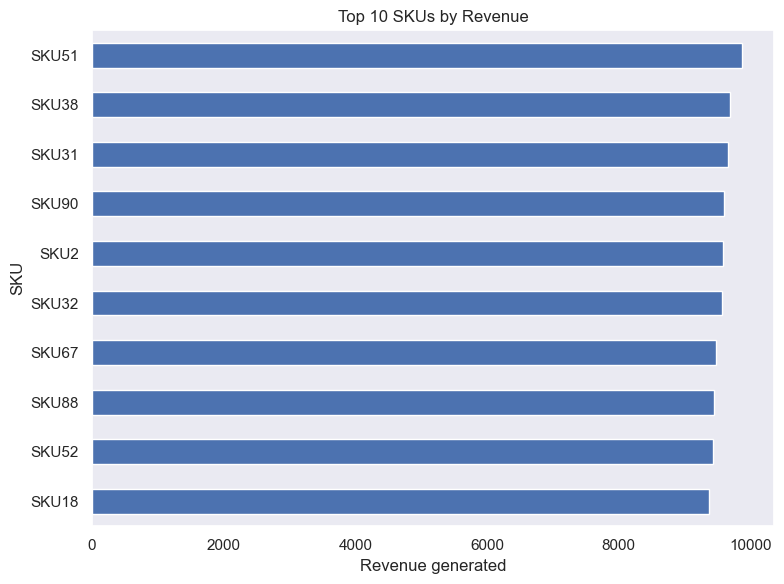

In [64]:
top_skus = df.groupby("SKU")["Revenue generated"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,6))
top_skus.sort_values().plot(kind="barh")
plt.title("Top 10 SKUs by Revenue")
plt.xlabel("Revenue generated")
plt.ylabel("SKU")
plt.tight_layout()
plt.show()

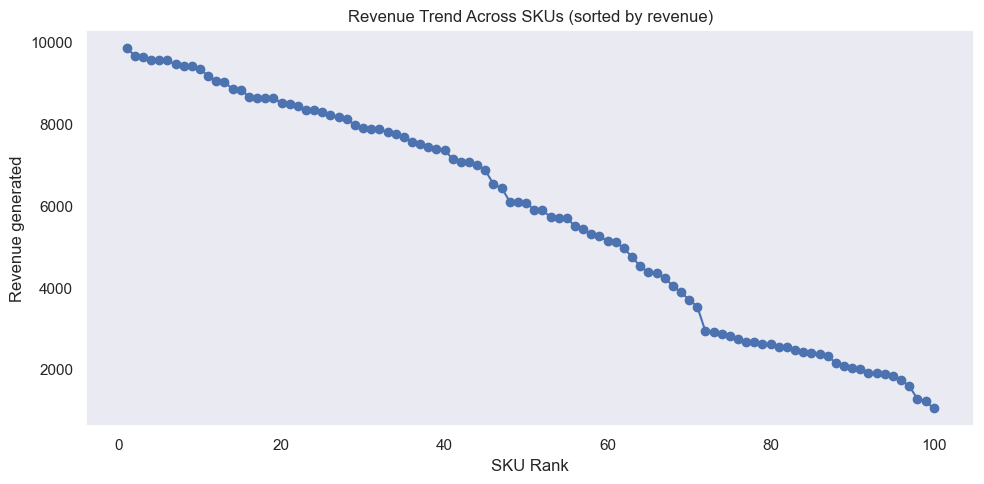

In [65]:
rev_by_sku = df.groupby("SKU")["Revenue generated"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.plot(range(1, len(rev_by_sku)+1), rev_by_sku.values, marker="o")
plt.title("Revenue Trend Across SKUs (sorted by revenue)")
plt.xlabel("SKU Rank")
plt.ylabel("Revenue generated")
plt.tight_layout()
plt.show()

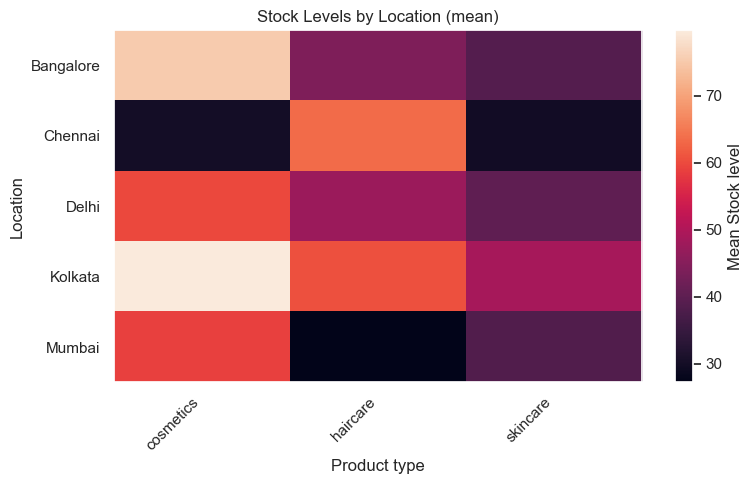

In [66]:
pivot_stock = df.pivot_table(index="Location", columns="Product type", values="Stock levels", aggfunc="mean")
plt.figure(figsize=(8,5))
plt.imshow(pivot_stock.values, aspect="auto")
plt.title("Stock Levels by Location (mean)")
plt.xticks(ticks=np.arange(pivot_stock.shape[1]), labels=list(pivot_stock.columns), rotation=45, ha="right")
plt.yticks(ticks=np.arange(pivot_stock.shape[0]), labels=list(pivot_stock.index))
plt.xlabel("Product type")
plt.ylabel("Location")
plt.colorbar(label="Mean Stock level")
plt.tight_layout()
plt.show()

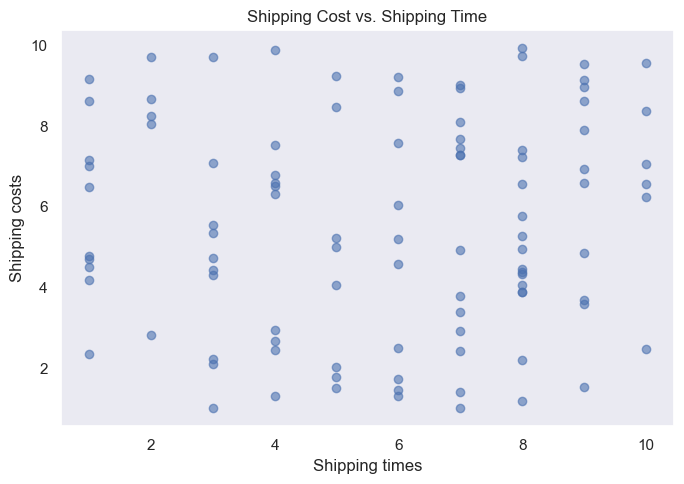

In [67]:
plt.figure(figsize=(7,5))
plt.scatter(df["Shipping times"], df["Shipping costs"], alpha=0.6)
plt.title("Shipping Cost vs. Shipping Time")
plt.xlabel("Shipping times")
plt.ylabel("Shipping costs")
plt.tight_layout()
plt.show()

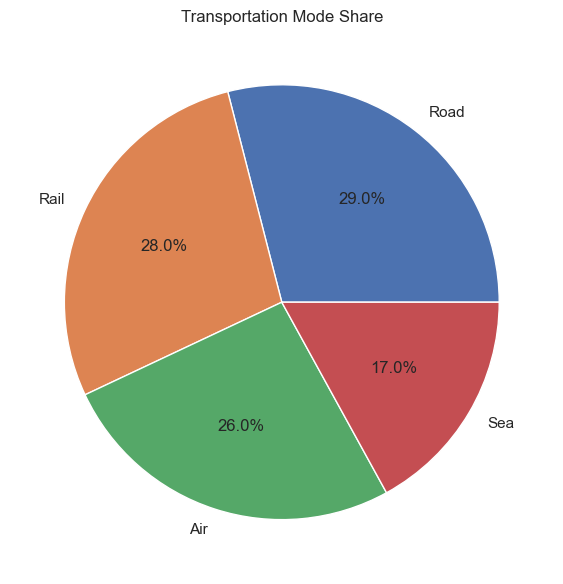

In [68]:
mode_counts = df["Transportation modes"].value_counts()
plt.figure(figsize=(6,6))
mode_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Transportation Mode Share")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Feature Engineering

In [71]:
#Train/Test Split & Preprocessing Pipelines ---
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [72]:
# Choose target column (fallback to last numeric column if 'Cost' not present)
target_candidates = [c for c in ["Cost", "cost", "Total_Cost", "total_cost"] if c in df_clean.columns]
if target_candidates:
    target_col = target_candidates[0]
else:
    # Fallback: last numeric column as target (just to proceed)
    target_col = num_cols[-1] if num_cols else df_clean.columns[-1]
print("\nTarget column selected:", target_col)


Target column selected: Costs


# Model Building

In [75]:
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

In [76]:
# Recompute types after cleaning
X_num = X.select_dtypes(include=[np.number]).columns.tolist()
X_cat = X.select_dtypes(exclude=[np.number]).columns.tolist()
print("Final numeric features:", X_num)
print("Final categorical features:", X_cat)

Final numeric features: ['Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs', 'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Defect rates']
Final categorical features: ['Product type', 'SKU', 'Customer demographics', 'Shipping carriers', 'Supplier name', 'Location', 'Inspection results', 'Transportation modes', 'Routes']


In [77]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(with_mean=True, with_std=True), X_num),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse=False), X_cat)
    ],
    remainder="drop"
)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [79]:
#Train Multiple Models 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [80]:
models = {}

In [81]:
# Linear Regression
lr_pipeline = Pipeline(steps=[("prep", preprocess), ("model", LinearRegression())])
lr_pipeline.fit(X_train, y_train)
models["Linear Regression"] = lr_pipeline

C:\Users\geeth\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [82]:
# Random Forest
rf_pipeline = Pipeline(steps=[("prep", preprocess), ("model", RandomForestRegressor(
    n_estimators=300, random_state=42, n_jobs=-1
))])
rf_pipeline.fit(X_train, y_train)
models["Random Forest"] = rf_pipeline

C:\Users\geeth\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [83]:
# Try XGBoost if available
xgb_available = True
try:
    from xgboost import XGBRegressor
except Exception as e:
    xgb_available = False
    print("\nXGBoost not available:", e)

if xgb_available:
    xgb_pipeline = Pipeline(steps=[("prep", preprocess), ("model", XGBRegressor(
        n_estimators=400, max_depth=6, learning_rate=0.05, subsample=0.8,
        colsample_bytree=0.8, objective="reg:squarederror", random_state=42
    ))])
    xgb_pipeline.fit(X_train, y_train)
    models["XGBoost"] = xgb_pipeline

print("\nModels trained:", list(models.keys()))


XGBoost not available: No module named 'xgboost'

Models trained: ['Linear Regression', 'Random Forest']


# Model Evaluation

In [85]:
#Evaluate Models ---
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(model, X_te, y_te):
    preds = model.predict(X_te)
    mae = mean_absolute_error(y_te, preds)
    mse = mean_squared_error(y_te, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_te, preds)
    return mae, rmse, r2, preds

In [86]:
results = []
pred_store = {}

In [87]:
for name, model in models.items():
    mae, rmse, r2, preds = evaluate(model, X_test, y_test)
    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2})
    pred_store[name] = preds

results_df = pd.DataFrame(results).sort_values(by="RMSE")
print("\nModel comparison (sorted by RMSE):")
display(results_df)


Model comparison (sorted by RMSE):


,Model,MAE,RMSE,R2
1,Random Forest,275.431645,311.942388,-0.493512
0,Linear Regression,292.115126,357.053435,-0.956710


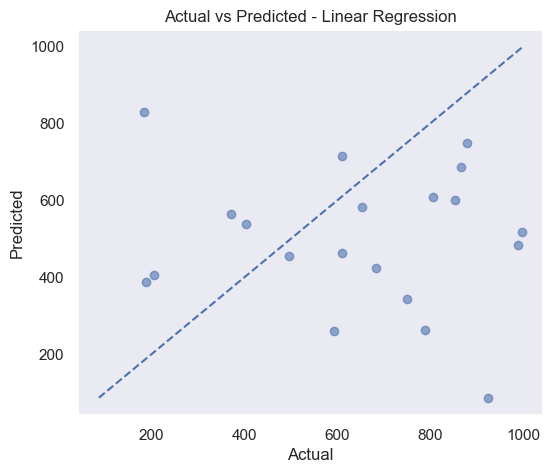

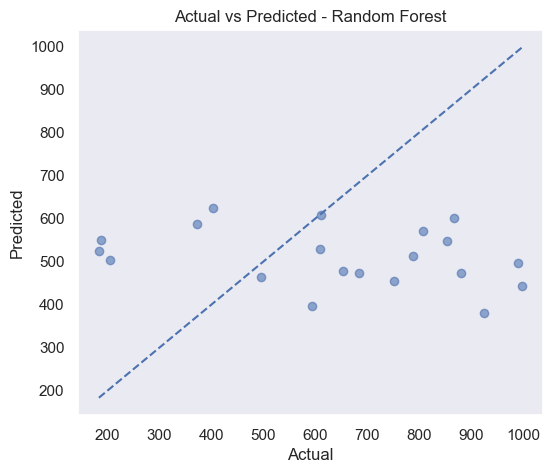

In [88]:
 #Visualization 
for name, preds in pred_store.items():
    plt.figure(figsize=(6, 5))
    plt.scatter(y_test, preds, alpha=0.6)
    lims = [min(y_test.min(), preds.min()), max(y_test.max(), preds.max())]
    plt.plot(lims, lims, linestyle="--")  # 45° line
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Actual vs Predicted - {name}")
    plt.show()

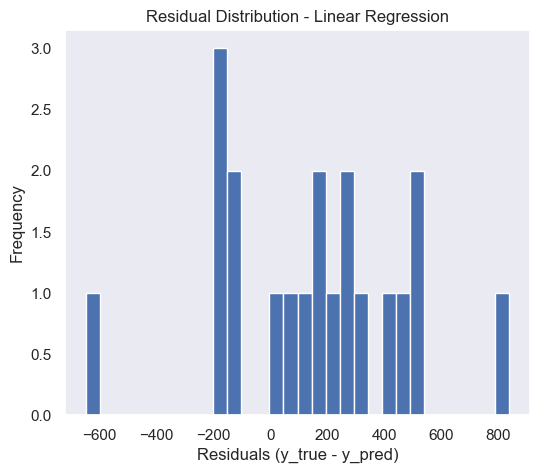

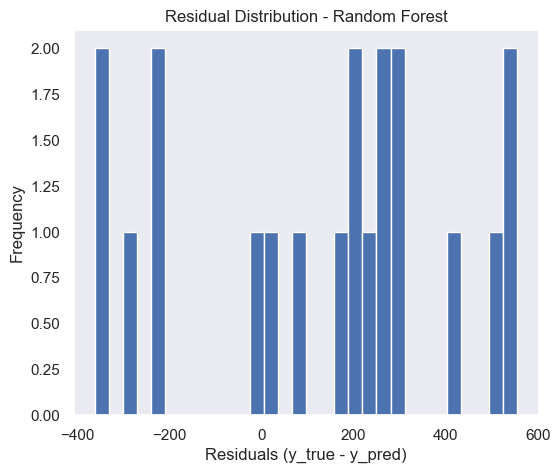

In [89]:
#Residual Plots
for name, preds in pred_store.items():
    residuals = y_test - preds
    plt.figure(figsize=(6, 5))
    plt.hist(residuals, bins=30)
    plt.xlabel("Residuals (y_true - y_pred)")
    plt.ylabel("Frequency")
    plt.title(f"Residual Distribution - {name}")
    plt.show()


Top 15 Feature Importances (Random Forest):


C:\Users\geeth\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Order quantities            0.124506
Lead times                  0.072192
Price                       0.063810
Revenue generated           0.058278
Defect rates                0.055961
Number of products sold     0.053679
Production volumes          0.052597
Manufacturing costs         0.052015
Shipping times              0.047112
Shipping costs              0.047089
Availability                0.041680
Lead time                   0.039727
Stock levels                0.037584
Manufacturing lead time     0.028162
Transportation modes_Sea    0.016961
dtype: float64

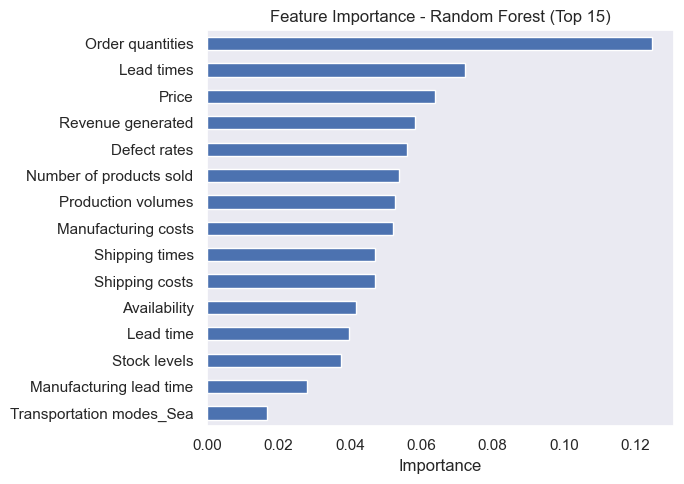

In [90]:
#Simple Feature Importance (for tree models) ---
if "Random Forest" in models:
    # Get feature names after preprocessing
    # We need to fit the preprocesser alone to extract one-hot names
    prep_only = preprocess.fit(X_train)
    num_features = X_num
    cat_features = []
    if X_cat:
        cat_features = prep_only.named_transformers_["cat"].get_feature_names_out(X_cat).tolist()
    feature_names = num_features + cat_features

    rf_model = models["Random Forest"].named_steps["model"]
    importances = rf_model.feature_importances_
    # Align lengths (in case ColumnTransformer dropped some)
    k = min(len(feature_names), len(importances))
    feat_imp = pd.Series(importances[:k], index=feature_names[:k]).sort_values(ascending=False).head(15)

    print("\nTop 15 Feature Importances (Random Forest):")
    display(feat_imp)

    plt.figure(figsize=(7,5))
    feat_imp.sort_values().plot(kind="barh")
    plt.title("Feature Importance - Random Forest (Top 15)")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

